In [1]:
import pandas as pd
import glob
from scipy.stats import kendalltau
import numpy as np

In [3]:
# path to the directory containing the CSV files
path = "results/final/gpt3.5/*"

# list of all CSV files
files = glob.glob(path)

# read and concatenate all CSV files into a single DataFrame
df_list_3 = [pd.read_csv(file) for file in files]
combined_df_gpt3 = pd.concat(df_list_3, ignore_index=True)


In [1]:
combined_df_gpt3 = combined_df_gpt3.drop(columns=['Unnamed: 0'], inplace=False)

NameError: name 'combined_df_gpt3' is not defined

In [ ]:
len(combined_df_gpt3)

In [ ]:
# path to the directory containing the CSV files
path = "results/final/mistral/*"

# list of all CSV files
files = glob.glob(path)

# read and concatenate all CSV files into a single DataFrame
df_list_m = [pd.read_csv(file) for file in files]
combined_df_mistral = pd.concat(df_list_m, ignore_index=True)

In [ ]:
combined_df = pd.concat([combined_df_gpt3, combined_df_mistral], axis=0)

In [6]:
combined_df = combined_df.drop(columns=['Unnamed: 0'], inplace=False)

NameError: name 'combined_df' is not defined

In [ ]:
len(combined_df)

In [ ]:
# path to the directory containing the CSV files
path = "results/final/llama/*"

# list of all CSV files
files = glob.glob(path)

# read and concatenate all CSV files into a single DataFrame
df_list_ll = [pd.read_csv(file) for file in files]
combined_df_llama = pd.concat(df_list_ll, ignore_index=True)

In [ ]:
combined_df = pd.concat([combined_df, combined_df_llama], axis=0)

In [ ]:
combined_df = combined_df.drop(columns=['Unnamed: 0'], inplace=False)

In [ ]:
len(combined_df)

In [25]:
df = combined_df

In [27]:
df['sum'] = df['heart_rate'] + df['blood_pressure'] + df['body_temperature'] + df['respiratory_rate'] + df['oxygen_saturation'] 

In [29]:
df['average'] = df['sum'] / 5 

In [31]:
df.head()

,heart_rate,blood_pressure,body_temperature,respiratory_rate,oxygen_saturation,diet,model,sum,average
0,0.5,0.6,0.4,0.3,0.5,Middle Eastern Diet,gpt-3.5-turbo,2.3,0.46
1,0.5,0.6,0.3,0.4,0.7,Korean Diet,gpt-3.5-turbo,2.5,0.50
2,0.7,0.8,0.3,0.6,0.7,Japanese Diet,gpt-3.5-turbo,3.1,0.62
3,0.6,0.7,0.3,0.5,0.4,Thai Diet,gpt-3.5-turbo,2.5,0.50
4,0.8,0.9,0.4,0.7,0.6,Mediterranean Diet,gpt-3.5-turbo,3.4,0.68


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

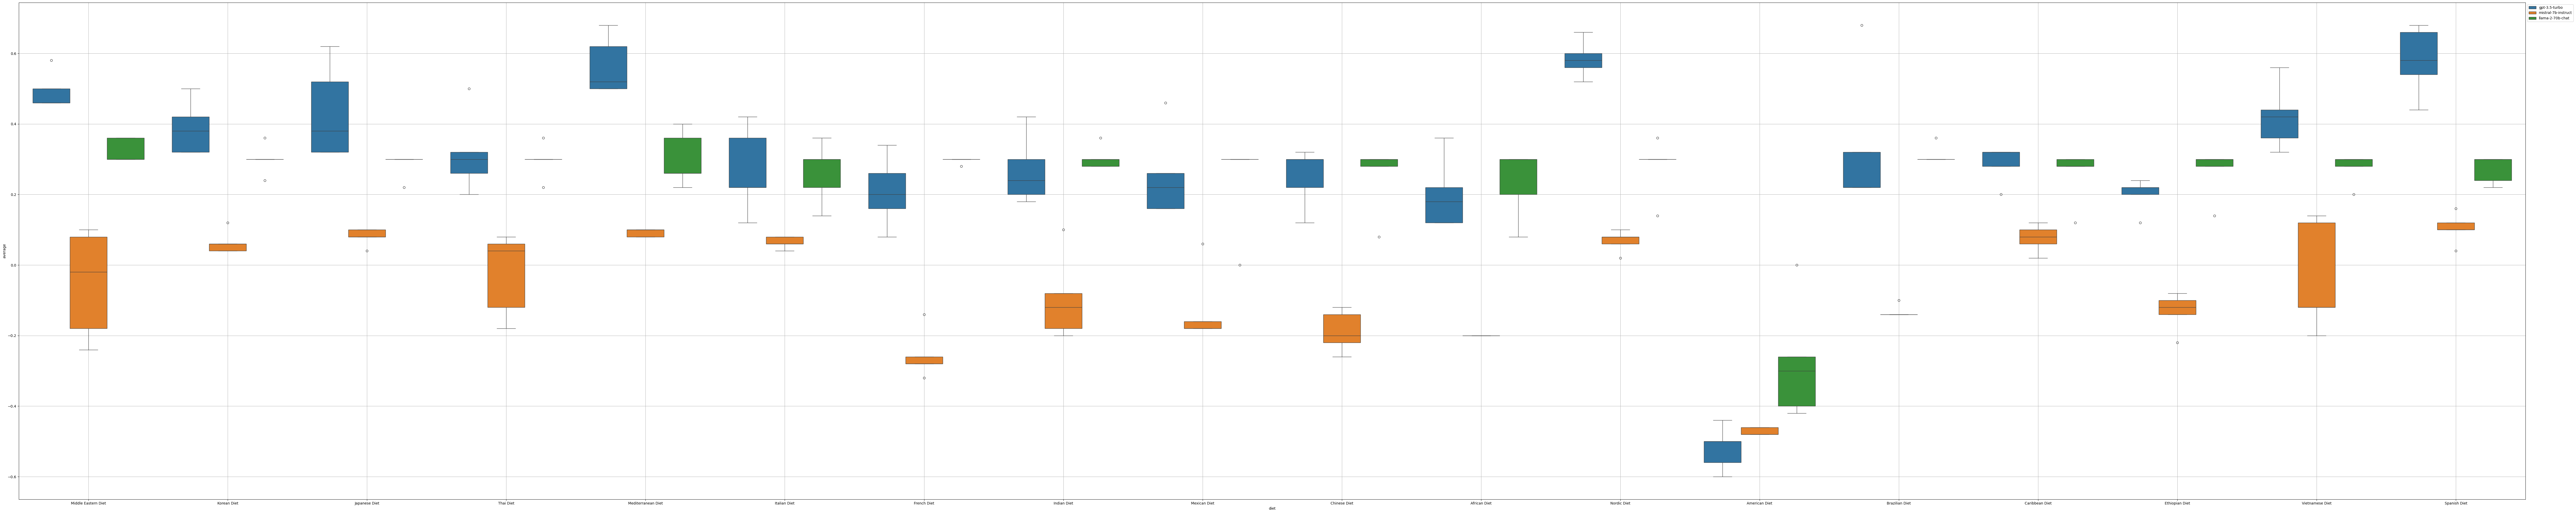

In [34]:
plt.figure(figsize=(100, 20))  
    
sns.boxplot(x='diet', y='average', hue='model', data=df)
    
plt.grid(True)  
plt.legend(loc='upper left', bbox_to_anchor=(1, 1)) 
    
plt.tight_layout()  
plt.show()

The goal of the figure is to compare the distributions of different diets and different large language models using a holistic measure of health which is the average of their effect on physiological signs such as heart rate, blood pressure, body temperature, respiratory rate, and oxygen saturation on a scale of -1 to 1. The implicit hypothesis is that each large langauge model will find different diets healthier than others. 

These are the diets each model finds the healthiest: 
chatgpt-3.5-turbo: Brazilian Diet, Mediterranean Diet, Spanish Diet, Nordic Diet
llama-2-70b-chat: Mediterranean Diet, Middle Eastern Diet, Thai Diet, Indian Diet, Spanish Diet
mistral-7b-instruct: Spanish Diet, Vietnamese Diet,Carribean Diet, Korean Diet 
openai/chatgpt-4o-latest: Japanese Diet, Italian Diet, Mediterranean Diet, Japanese Diet

gpt-3.5-turbo tends to rank diets higher than the other large language models. llama and chat-gpt 4 are similar in their ratings of each the impact of diet on health. mistral ranks diets to have a more neutral to negative impact on physiological signs. mistral has greater variability within their ratings hence the longer boxplots.

Mean values for heart_rate:
diet
African Diet           0.080000
American Diet         -0.593333
Brazilian Diet         0.120000
Caribbean Diet         0.073333
Chinese Diet           0.040000
Ethiopian Diet         0.060000
French Diet            0.046667
Indian Diet            0.093333
Italian Diet           0.113333
Japanese Diet          0.120000
Korean Diet            0.113333
Mediterranean Diet     0.213333
Mexican Diet           0.080000
Middle Eastern Diet    0.160000
Nordic Diet            0.200000
Spanish Diet           0.206667
Thai Diet              0.113333
Vietnamese Diet        0.133333
Name: heart_rate, dtype: float64

Mean values for blood_pressure:
diet
African Diet           0.066667
American Diet         -0.560000
Brazilian Diet         0.173333
Caribbean Diet         0.473333
Chinese Diet           0.133333
Ethiopian Diet         0.100000
French Diet            0.040000
Indian Diet            0.166667
Italian Diet           0.460000
Japanese Diet          0.586667


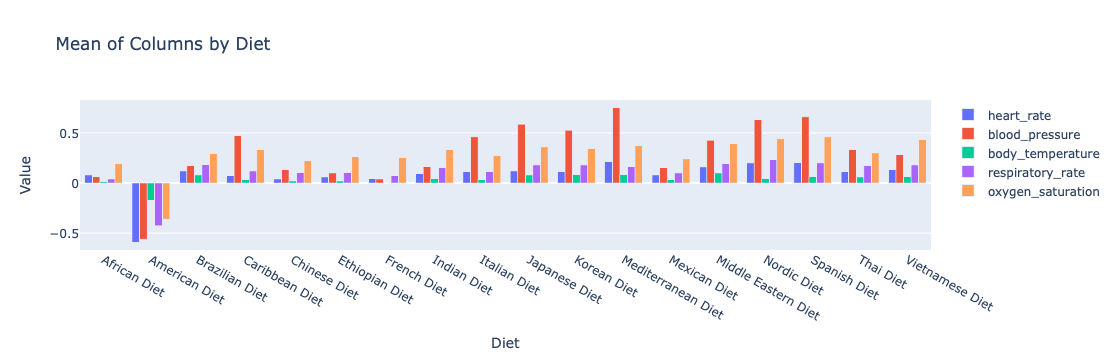

In [83]:
import plotly.graph_objs as go

columns_to_plot = ['heart_rate', 'blood_pressure', 'body_temperature', 'respiratory_rate', 'oxygen_saturation']

fig = go.Figure()

for clmn in columns_to_plot:
    subs = df.groupby('diet')[clmn].mean() 
    print(f"Mean values for {clmn}:\n{subs}\n")  
    fig.add_trace(go.Bar(x=subs.index, y=subs, name=f'{clmn}'))

fig.update_layout(title='Mean of Columns by Diet', xaxis_title='Diet', yaxis_title='Value', barmode='group')
fig.show()


The goal of this figure is to compare various physiological measurements across different diets. It visualizes the mean values of heart rate, blood pressure, body temperature, respiratory rate, and oxygen saturation for each diet type. The implicit hypothesis seems to be that different diets may have varying effects on key physiological parameters. This one to investigate whether certain diets are associated with more favorable health indicators.

The American diet shows noticeably lower values across most parameters, particularly for blood pressure and heart rate.This could be because the American diet is higher in sodium intake and has increased saturated and trans fats 

African and Caribbean diets appear to be associated with higher blood pressure values.These diets may include higher amounts of sodium or saturated fats, which could contribute to elevated blood pressure. Cultural and genetic factors might also play a role.

This diet shows relatively balanced values across all parameters. The Mediterranean diet, known for its balance of fruits, vegetables, whole grains, and healthy fats, is often associated with good overall health outcomes. This balanced approach might explain the moderate values across all physiological parameters.

Japanese Diet.Shows lower blood pressure and heart rate, similar to the Korean diet.The Japanese diet, rich in fish, seaweed, and fermented foods, shares some similarities with the Korean diet. These components may contribute to better cardiovascular health.

Oxygen saturation seems to vary less dramatically across diets compared to other parameters.Oxygen saturation might be less directly influenced by diet and more affected by factors like altitude, overall lung health, or physical activity levels.

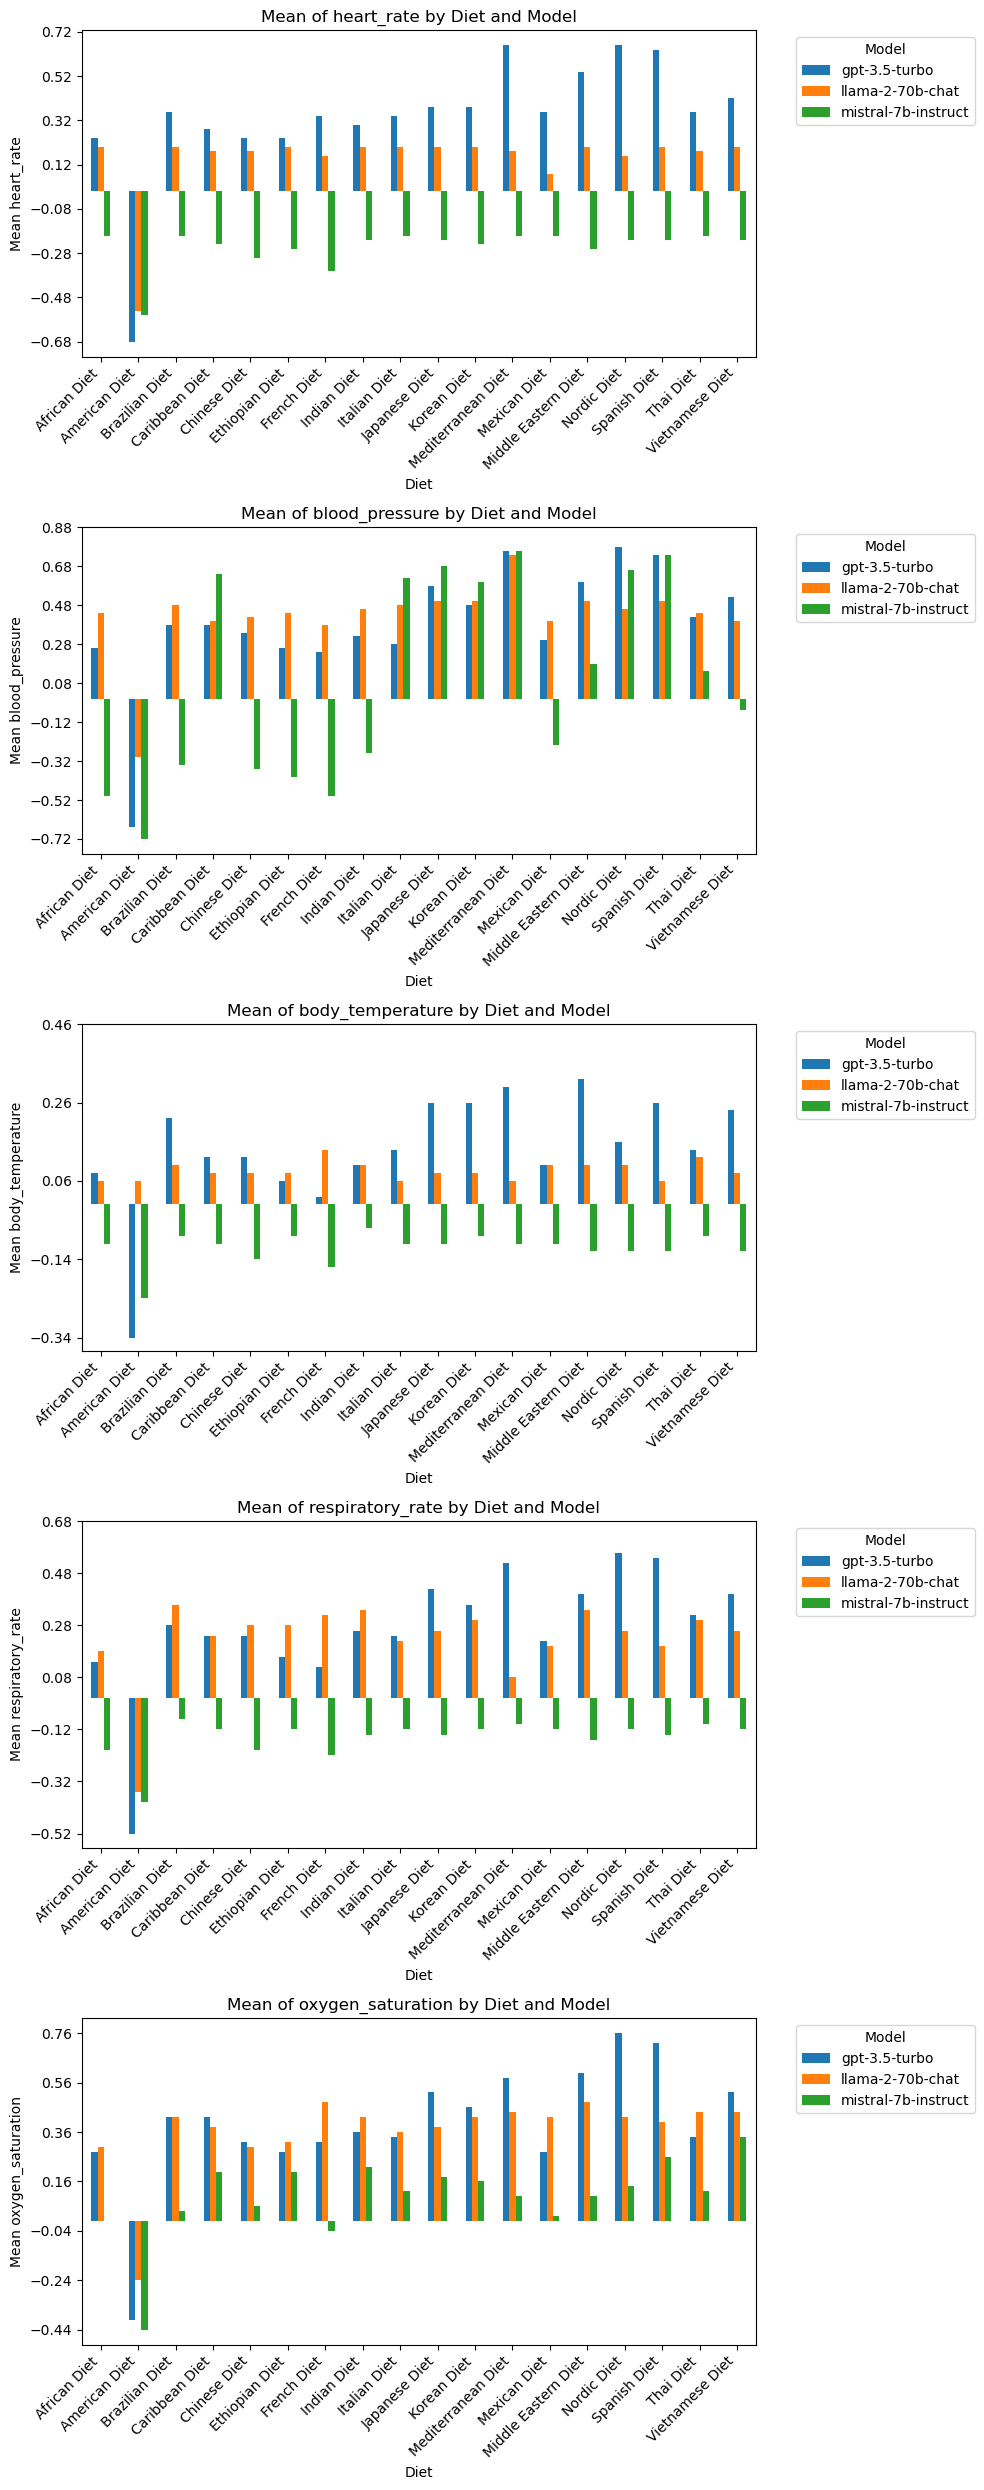

In [93]:
import matplotlib.pyplot as plt
import numpy as np

# unique diets for setting the ticks and labels
diets = df['diet'].unique()

# columns representing vital signs to plot
columns_to_plot = ['heart_rate', 'blood_pressure', 'body_temperature', 'respiratory_rate', 'oxygen_saturation']

large_language_models = df['model'].unique()

# create subplots with one row per column in `columns_to_plot`
fig, axs = plt.subplots(len(columns_to_plot), 1, figsize=(10, 5 * len(columns_to_plot)))

for ax, column in zip(axs, columns_to_plot):
    # group by diet and large language model, then calculate mean
    subset = df.groupby(['diet', 'model'])[column].mean().unstack()
    
    # plot each large language model as a separate bar in the bar plot
    subset.plot(kind='bar', ax=ax)
    
    # set titles and labels
    ax.set_title(f'Mean of {column} by Diet and Model')
    ax.set_xlabel('Diet')
    ax.set_ylabel(f'Mean {column}')
    
    # set y-ticks (customize range as needed)
    ax.set_yticks(np.arange(subset.values.min(), subset.values.max() + 0.2, 0.2))
    
    # set x-ticks and labels
    ax.set_xticks(range(len(subset.index)))
    ax.set_xticklabels(subset.index, rotation=45, ha='right')
    
    # add legend outside the plot
    ax.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')

# adjust layout and show the plots
plt.tight_layout()
plt.show()



The figure presents a comparison of the mean blood pressure, mean body temperature, respiratory rate, and oxygem saturation across various diets, as predicted by three different models: GPT-3.5-turbo, Llama-2-70b-chat, and Mistral-7b-instruct. The goal of this analysis is to evaluate the consistency and accuracy of these models in predicting physiological responses (specifically blood pressure and body temperature) across a diverse set of diets.


The implicit hypothesis is that different diets will have distinct effects on , and that these effects will be captured differently by each of the three models. The expectation is that each model will show similar trends, but potentially with varying degrees of magnitude in their predictions.


The models generally agree on the direction of blood pressure changes across diets, with all models showing both positive and negative shifts in mean blood pressure depending on the diet. A noticeable difference is observed in the predictions for certain diets, such as the Mediterranean and Vietnamese diets, where the Mistral-7b-instruct model shows a significant negative impact on blood pressure, whereas the other two models predict more moderate effects.


Similar to the blood pressure predictions, there is general agreement among the models, though the magnitude of changes varies. For example, the Mistral-7b-instruct model often predicts a larger change in body temperature compared to GPT-3.5-turbo and Llama-2-70b-chat, particularly for the Korean and Nordic diets.


The observed differences in model predictions could be attributed to the underlying architecture and training data of each model. Mistral-7b-instruct, which tends to predict more extreme physiological changes, might have been trained on data or using a method that emphasizes edge cases or more pronounced effects of dietary changes. Conversely, GPT-3.5-turbo and Llama-2-70b-chat may have more generalized or conservative prediction algorithms, leading to more moderate outputs.

These variations underscore the importance of model selection when applying AI to physiological predictions, as different models might capture different nuances in data or overemphasize certain effects, leading to divergent outcomes. Further analysis and calibration of these models are necessary to ensure that their predictions align more closely with empirical data.

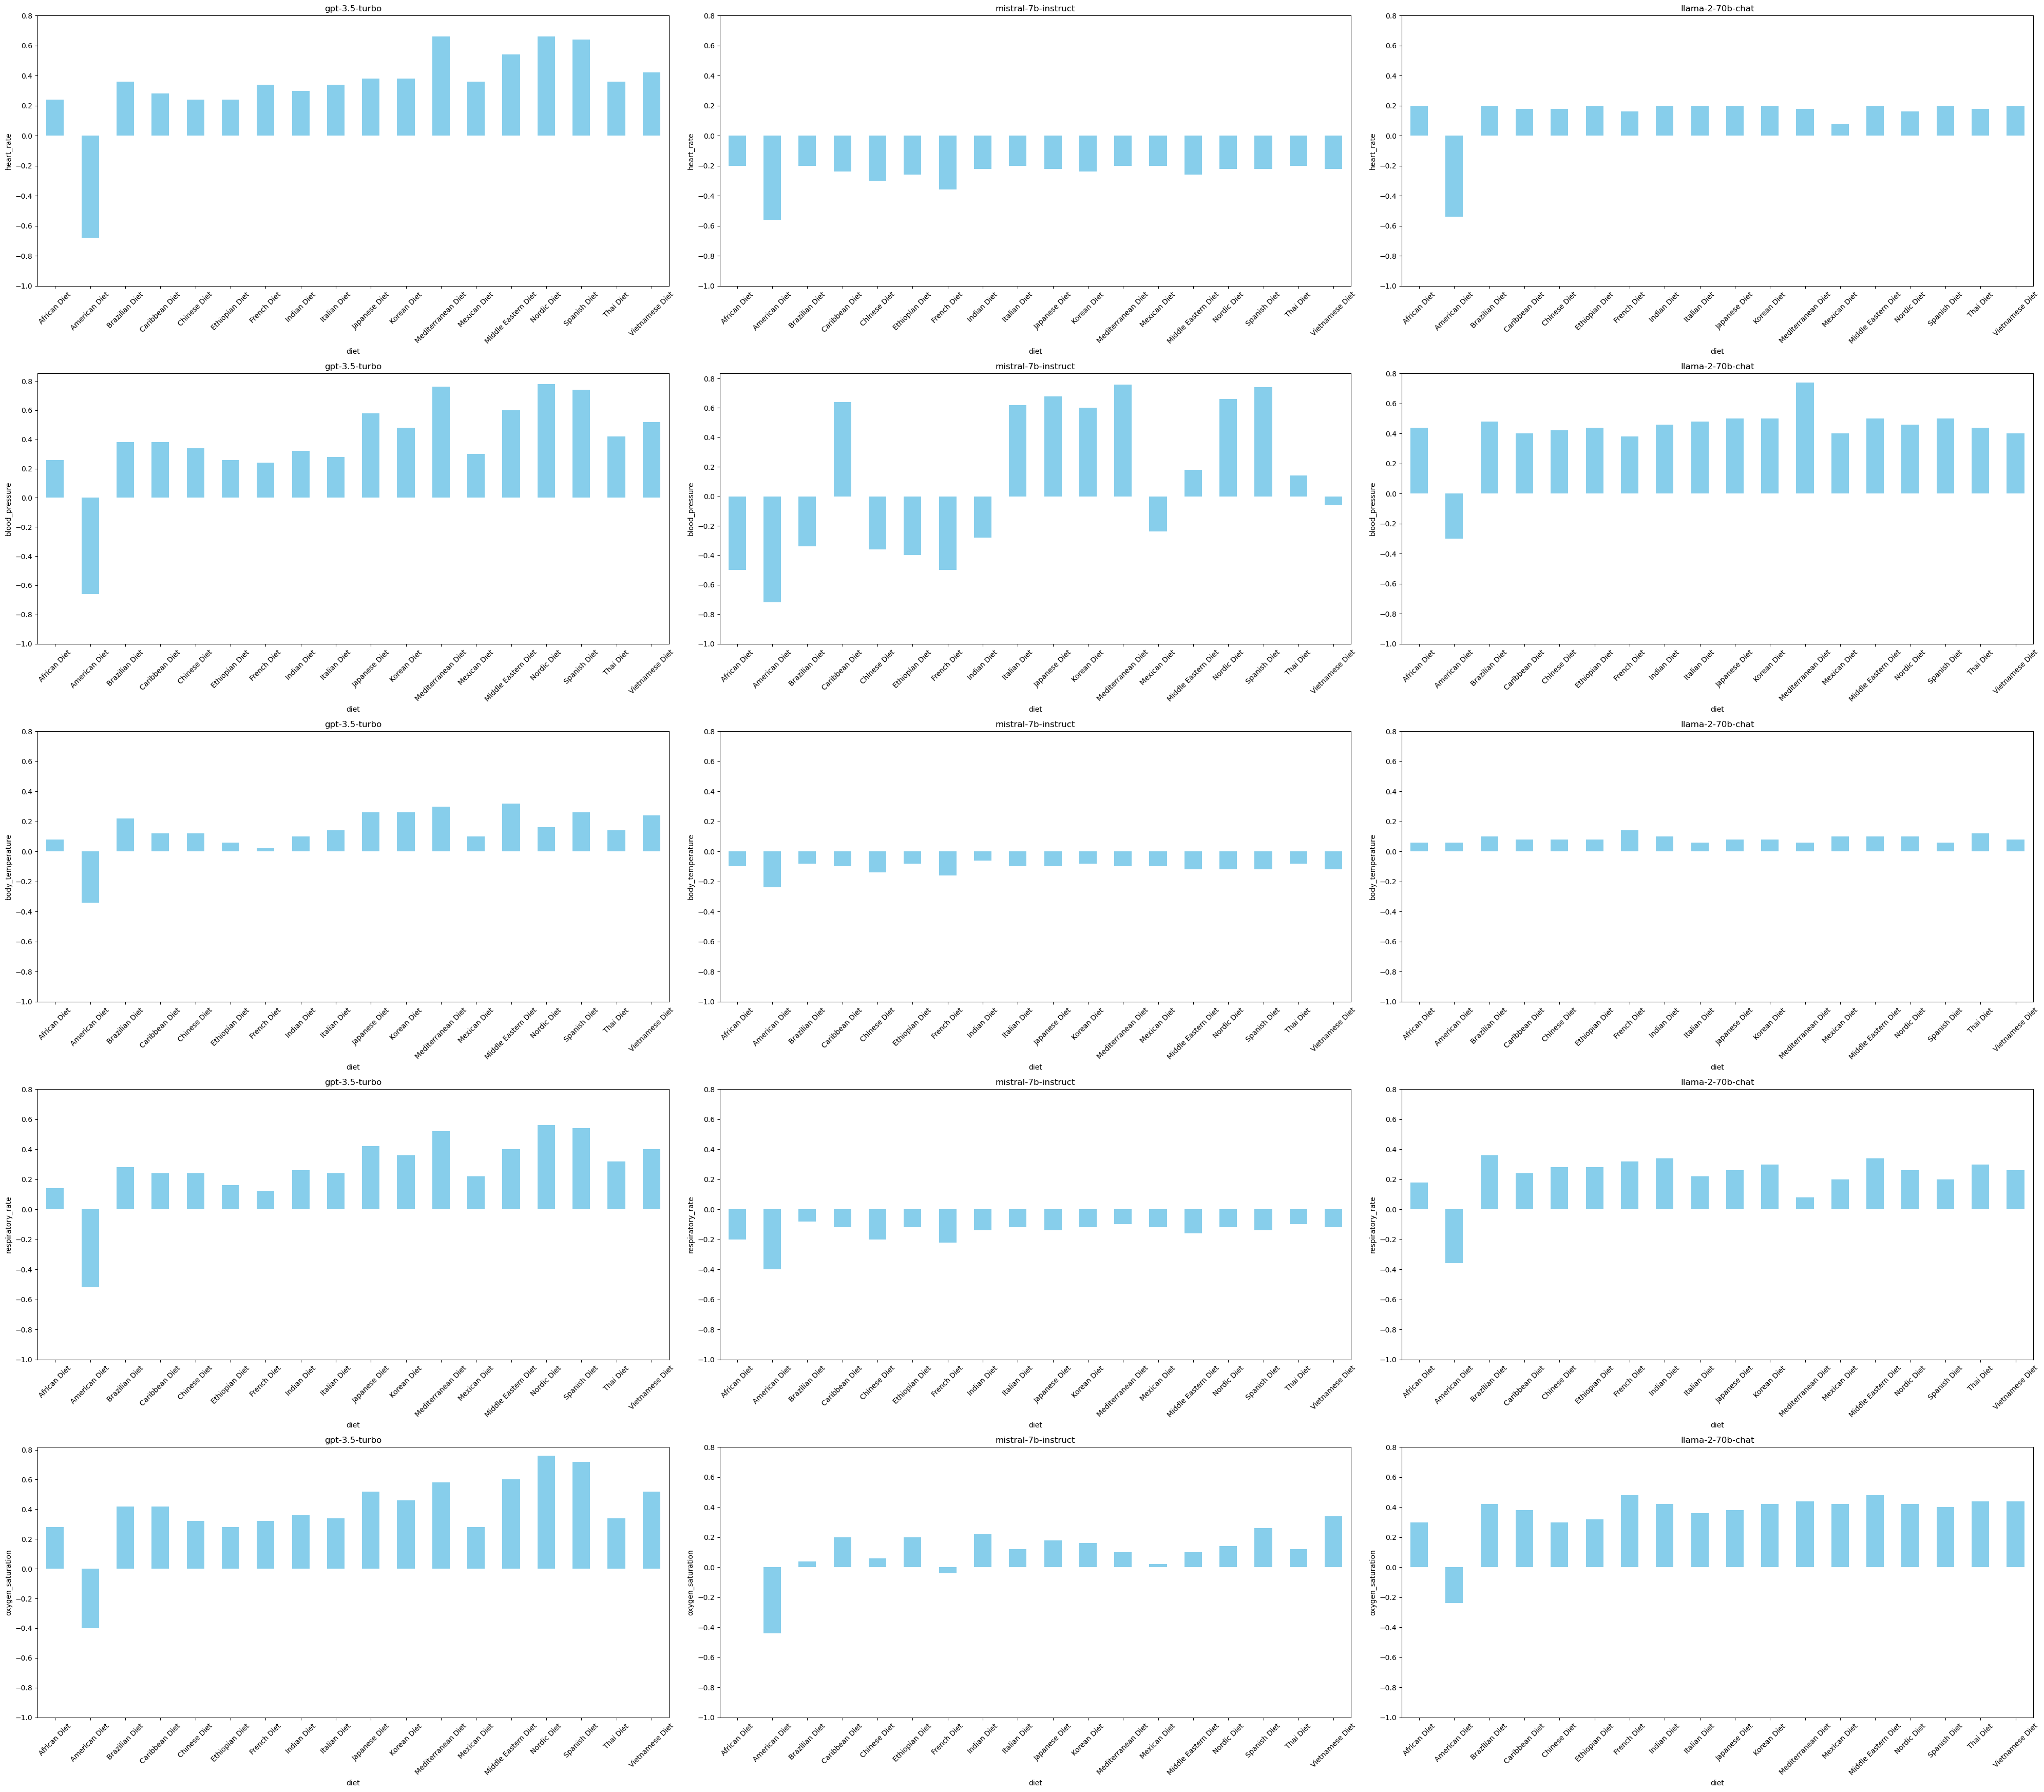

In [63]:
import matplotlib.pyplot as plt

# unique diets and models for setting the ticks and labels
diets = df['diet'].unique()
large_language_models = df['model'].unique()

#columns representing vital signs to plot
columns_to_plot = ['heart_rate', 'blood_pressure', 'body_temperature', 'respiratory_rate', 'oxygen_saturation']  # Replace with your actual column names

# create a figure with 5 rows (one for each vital sign) and 5 columns (one for each model)
fig, axs = plt.subplots(len(columns_to_plot), len(large_language_models), figsize=(40, 35))

# loop over each vital sign (row) and each model (column)
for i, column in enumerate(columns_to_plot):
    for j, model in enumerate(large_language_models):
        # filter the data for the current model
        subset = df[df['model'] == model].groupby('diet')[column].mean()
        
        # plot the diets on the x-axis and the mean value of the vital sign on the y-axis
        subset.plot(kind='bar', ax=axs[i, j], color = 'skyblue')
        
        axs[i, j].set_title(f'{model}')
        axs[i, j].set_xlabel('diet')
        axs[i, j].set_ylabel(f'{column}')
           

        axs[i, j].set_xticklabels(subset.index, rotation=45, )
        axs[i, j].set_yticks(np.arange(-1, 1, 0.2))

# adjust layout and show the plots
plt.tight_layout()
plt.show()


The implicit hypothesis is that each model has its own interpretation of the different diets on physiological signs. Each model has its own ratings and tendencies when assessing the impact of different diets on these signs. GPT-3.5 is more extreme and exaggerated when it comes to relationships between diets and physiological signs. Mistral seems to suggest there isn't much of a relationship for oxygen saturation, body temperature, and respiratory rate, but it shows variability in blood pressure and rates all diets negatively for heart rate. LlamA seems to be a mix between the two. It is aligned with GPT-3.5 in terms of oxygen saturation, respiratory rate, and blood pressure but suggests a lower impact of diets on heart rate and respiratory rate.

These differences among the models reveal how each algorithm processes and interprets the data in its own unique way. GPT-3.5’s tendency to amplify relationships could be indicative of a more sensitive or complex internal structure, which might cause it to highlight even the smallest variations in the data. While this could be useful for detecting subtle effects, it also risks overestimating the impact of diets, potentially leading to exaggerated conclusions.

On the other hand, Mistral’s more conservative approach suggests a focus on robustness and avoiding false positives. Its tendency to downplay relationships where the data might be less clear—such as with oxygen saturation and respiratory rate—indicates that it may prioritize avoiding spurious correlations. This could be beneficial in scenarios where reliability is more important than sensitivity, but it might miss more nuanced or less obvious effects.

Llama, by comparison, seems to occupy a middle ground, blending aspects of both GPT-3.5 and Mistral. While it shares some of GPT-3.5’s sensitivities, particularly in metrics like oxygen saturation and respiratory rate, it tempers this with a more measured response in other areas, such as heart rate and blood pressure. This balanced approach suggests that LLaMA might be suited for tasks that require both a degree of sensitivity and caution, making it a versatile option depending on the specific requirements of the analysis.

Overall, the variations in how these models interpret the relationship between diets and physiological signs underscore the importance of model selection in data analysis. Understanding the strengths and weaknesses of each model allows for more informed decisions, ensuring that the chosen model aligns with the goals of the analysis—whether that’s maximizing sensitivity, minimizing false positives, or finding a balanced approach.